# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

req = {
    "appid": weather_api_key,
    "q": city

}
# Define an empty list to fetch the weather data for each city and city url list
city_data = []
city_url_list = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
# city url = #YOURCODEHERE
    city_url = f"{url}q={city}&appid={weather_api_key}"
    city_url_list.append(city_url)



    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | katsuura
Processing Record 3 of Set 1 | kanchanaburi
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | pontes e lacerda
Processing Record 6 of Set 1 | jiangzi
Processing Record 7 of Set 1 | kasamwa
Processing Record 8 of Set 1 | port saint john's
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | vadso
Processing Record 11 of Set 1 | gisborne
Processing Record 12 of Set 1 | mersing
Processing Record 13 of Set 1 | lihue
Processing Record 14 of Set 1 | haiku-pauwela
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | whitehorse
Processing Record 17 of Set 1 | socorro
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | menaka
Processing Record 20 of Set 1 | san patricio
Processing Record 21 of Set 1 | laguna
Processing Record 22 of Set 1 | kavaratti
Processing Rec

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,274.25,75,80,13.93,TF,1724458825
1,katsuura,35.1333,140.3000,301.13,80,88,6.26,JP,1724458392
2,kanchanaburi,14.6333,99.1000,298.43,94,99,1.43,TH,1724458826
3,bilibino,68.0546,166.4372,278.21,73,100,1.00,RU,1724458243
4,pontes e lacerda,-15.2261,-59.3353,301.59,33,6,2.23,BR,1724458409


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,274.25,75,80,13.93,TF,1724458825
1,katsuura,35.1333,140.3000,301.13,80,88,6.26,JP,1724458392
2,kanchanaburi,14.6333,99.1000,298.43,94,99,1.43,TH,1724458826
3,bilibino,68.0546,166.4372,278.21,73,100,1.00,RU,1724458243
4,pontes e lacerda,-15.2261,-59.3353,301.59,33,6,2.23,BR,1724458409


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

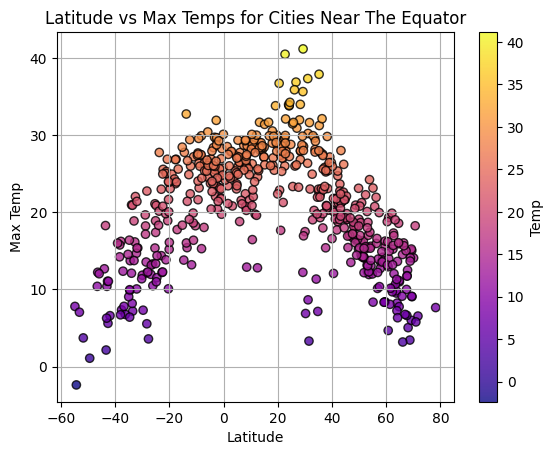

In [54]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], c=city_data_df['Max Temp'], edgecolor='black', cmap='plasma', alpha = 0.8)

# Incorporate the other graph properties
plt.title("Latitude vs Max Temps for Cities Near The Equator")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid(True)
plt.colorbar(label = "Temp")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

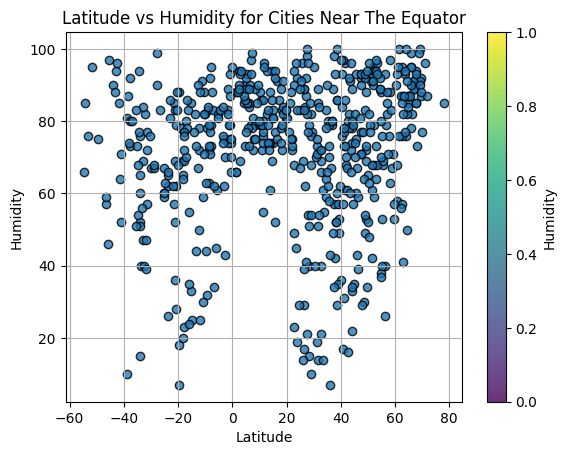

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black', alpha=0.8)

# Incorporate the other graph properties
plt.title("Latitude vs Humidity for Cities Near The Equator")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.colorbar(label='Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

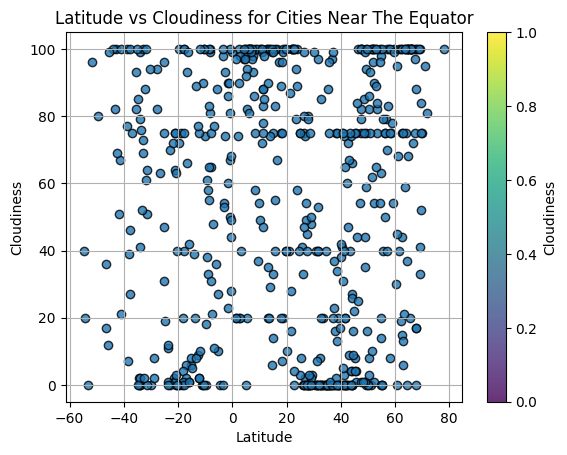

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black', alpha=0.8)

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness for Cities Near The Equator")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.colorbar(label='Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

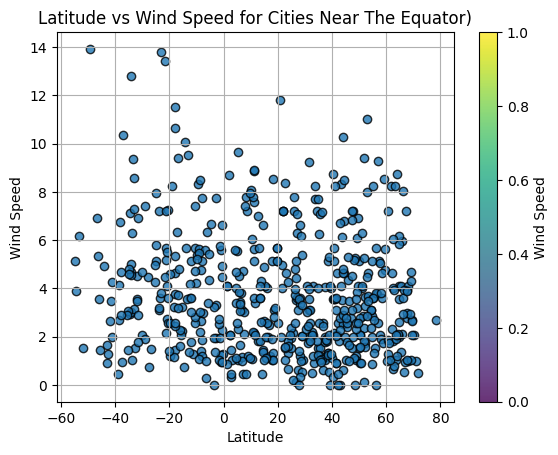

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black', alpha=0.8)

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed for Cities Near The Equator)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.colorbar(label='Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def lin_regress_plot(x, y, x_label, y_label, line_x_cord, line_y_coord):
    ''' Function takes in two columns or series of data and performs a linear regression calculation.
    
    Data:
        x: DataFrame column for plotting along the x-axis,
        y: DataFrame column for plotting along the y-axis,
        x_label: scatter plot x label,
        y_label: scatter plot y label,
        line_x_cord: x coordinate for regression line equation placement,
        line_y_coord: y coordinate for regression line equation placement.
    
    Returns: 0
    
    '''
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_y = x * slope + intercept
    print(f'The r-value is: {rvalue}')
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_y,"r", alpha=0.5)
    plt.annotate(line_equation,(line_x_cord,line_y_coord),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [22]:
#  Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,katsuura,35.1333,140.3000,301.13,80,88,6.26,JP,1724458392
2,kanchanaburi,14.6333,99.1000,298.43,94,99,1.43,TH,1724458826
3,bilibino,68.0546,166.4372,278.21,73,100,1.00,RU,1724458243
5,jiangzi,28.9500,89.6333,278.15,68,48,2.02,CN,1724458827
8,bethel,41.3712,-73.4140,294.00,78,0,2.06,US,1724458828


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,274.25,75,80,13.93,TF,1724458825
4,pontes e lacerda,-15.2261,-59.3353,301.59,33,6,2.23,BR,1724458409
6,kasamwa,-2.8500,32.4333,295.96,43,74,3.32,TZ,1724458828
7,port saint john's,-31.6229,29.5448,288.53,77,64,6.93,ZA,1724458233
10,gisborne,-38.6533,178.0042,287.08,81,100,2.70,NZ,1724458829


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7109631352042073


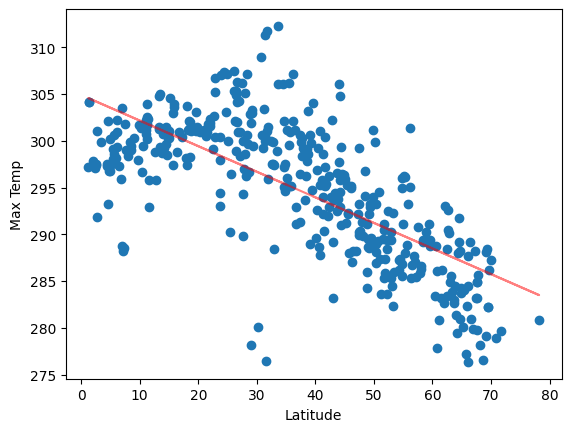

In [26]:
# Linear regression on Northern Hemisphere
lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", 10, -15)

The r-value is: 0.7152649743517546


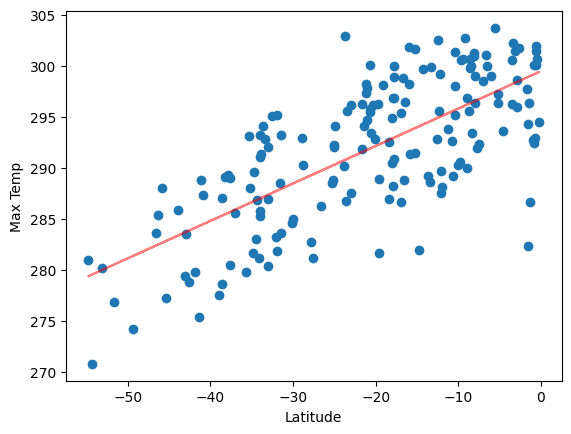

In [27]:
# Linear regression on Southern Hemisphere
lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", -30, 5)

**Discussion about the linear relationship:** There is a Strong Negative correlation between max temperature in the Northern Hemisphere and the latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.002344226462497634


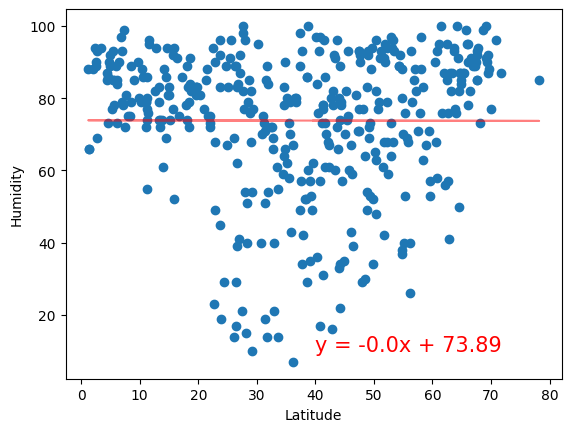

In [28]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", 40, 10)

The r-value is: 0.03597943217690025


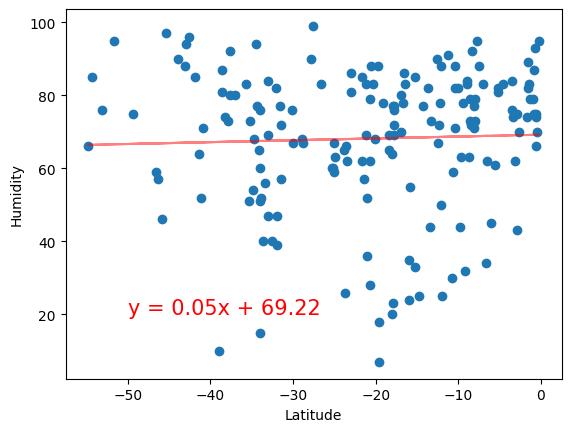

In [29]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", -50, 20)

**Discussion about the linear relationship:** There is no correlation between the LAtitude and Humidity in the Northern Hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.039738033988222454


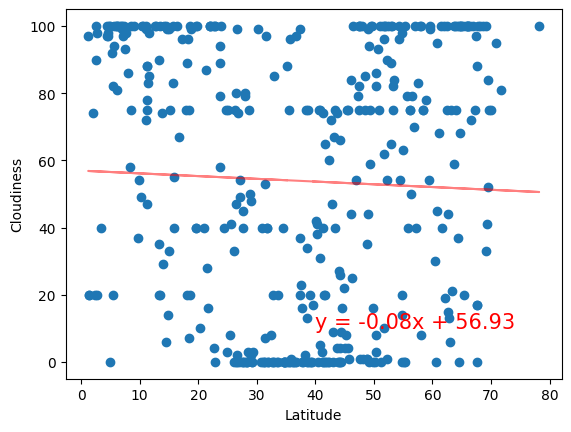

In [30]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", 40, 10)

The r-value is: 0.007469178260194001


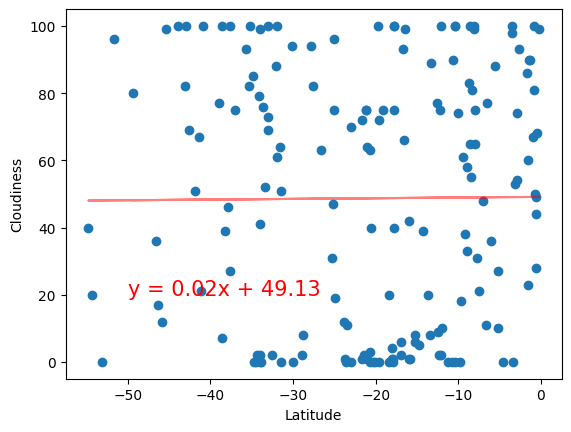

In [31]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", -50, 20)

**Discussion about the linear relationship:** Again, there is no corerlation between latitude and Cloudiness in the Southern Hemisphere. (i.e. a change in one doesn't imply any change in the other)

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.030208905863424267


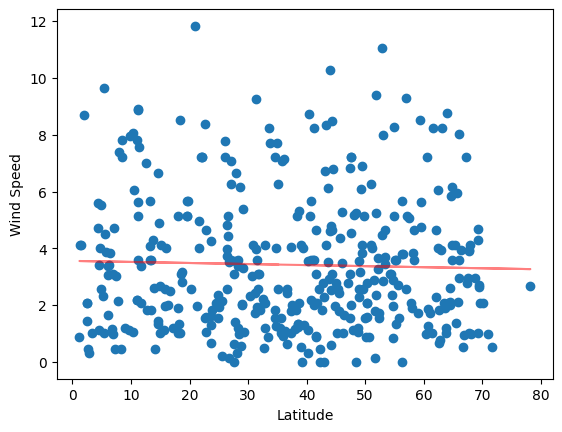

In [32]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", 5, 13)

The r-value is: -0.10535753937663218


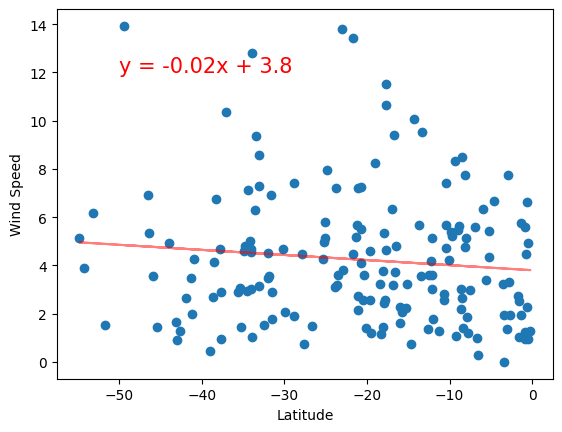

In [33]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", -50, 12)

**Discussion about the linear relationship:** There is no relationship between latitude and wind speed in the northern Hemisphere. (line flat)